In [1]:
# Performing Feature Engineering on Titanic dataset

In [2]:
import pandas as pd
adv =pd.read_csv(r"E:\Dataset\Social_Network_Ads\Social_Network_Ads.csv")
adv

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
adv.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
adv.shape

(400, 5)

In [51]:
adv1 = adv.drop(columns=['Gender', 'User ID'])


KeyError: "['Gender', 'User ID'] not found in axis"

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_tain,y_test =train_test_split(adv.drop("Purchased",axis=1),adv["Purchased"],test_size=0.25  ) #Purchased is target column so we drop it from x train and test

In [7]:
X_train

,Age,EstimatedSalary
231,39,42000
98,35,73000
103,33,149000
71,24,27000
257,40,57000
...,...,...
396,51,23000
21,47,49000
363,42,79000
130,31,58000


In [8]:
X_test

,Age,EstimatedSalary
171,34,115000
112,38,61000
124,41,51000
238,46,82000
46,25,79000
...,...,...
191,19,26000
315,39,75000
241,38,59000
185,31,66000


In [9]:
y_tain

231    0
98     0
103    1
71     0
257    0
      ..
396    1
21     1
363    0
130    0
320    1
Name: Purchased, Length: 300, dtype: int64

In [10]:
y_test

171    0
112    0
124    0
238    0
46     0
      ..
191    0
315    1
241    0
185    0
258    1
Name: Purchased, Length: 100, dtype: int64

#Standard Scaler


In [11]:
#import standard scaler from sklearn

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)
x_train_stdscaler = std_scaler.transform(X_train)
x_test_stdscaler = std_scaler.transform(X_test)

In [12]:
x_train_scaled = pd.DataFrame(x_train_stdscaler,columns=X_train.columns)


In [13]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.00000
mean,38.260000,71090.00000
std,10.359705,34356.51029
min,18.000000,15000.00000
25%,30.000000,44000.00000
50%,37.000000,71000.00000
75%,46.000000,88000.00000
max,60.000000,150000.00000


In [14]:
x_train_stdscaler

array([[ 0.07154996, -0.8481247 ],
       [-0.31520657,  0.05568643],
       [-0.50858484,  2.27148144],
       [-1.37878703, -1.28545266],
       [ 0.16823909, -0.41079673],
       [ 0.45830649,  1.68837749],
       [ 0.16823909,  0.20146242],
       [ 0.36161736,  0.05568643],
       [ 1.32850868, -1.46038385],
       [ 0.84506302, -1.48953904],
       [-0.31520657, -1.28545266],
       [ 0.84506302, -1.34376306],
       [-0.31520657,  0.11399682],
       [ 0.94175215,  0.72625597],
       [-1.76554356,  0.31808321],
       [-0.31520657, -0.32333114],
       [ 0.94175215,  1.95077427],
       [-1.86223269, -1.51869424],
       [-0.50858484, -0.58572792],
       [ 0.84506302, -1.19798707],
       [ 1.03844128,  2.03823986],
       [-0.79865223,  1.04696314],
       [-0.7019631 ,  1.36767032],
       [-1.37878703,  0.3763936 ],
       [-0.02513917, -0.00262397],
       [-1.86223269,  0.14315202],
       [-1.18540876, -1.63531503],
       [-0.31520657,  0.17230722],
       [ 0.84506302,

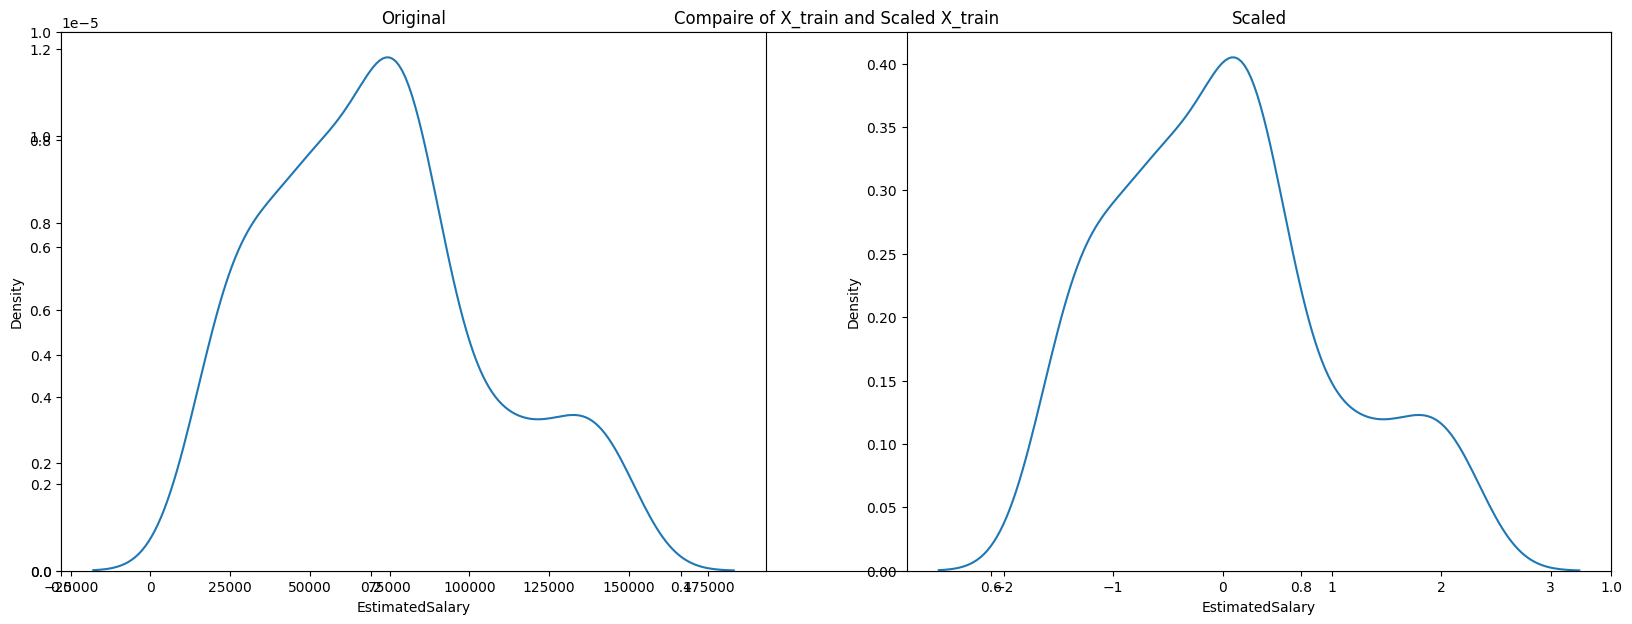

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
plt.title("Compaire of X_train and Scaled X_train")
plt.subplot(121)
sns.kdeplot(X_train["EstimatedSalary"])
plt.title("Original")
plt.subplot(122)
sns.kdeplot(x_train_scaled['EstimatedSalary'])
plt.title("Scaled")
plt.show()


#Min max method

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler()
scaler_min_max.fit(X_train)
x_train_min_max =scaler_min_max.transform(X_train)
x_test_min_max=scaler_min_max.transform(X_test)

In [44]:
X_train_min_max = pd.DataFrame(x_train_min_max,columns=X_train.columns)

In [45]:
x_test_min_max= pd.DataFrame(x_test_min_max,columns=X_test.columns)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

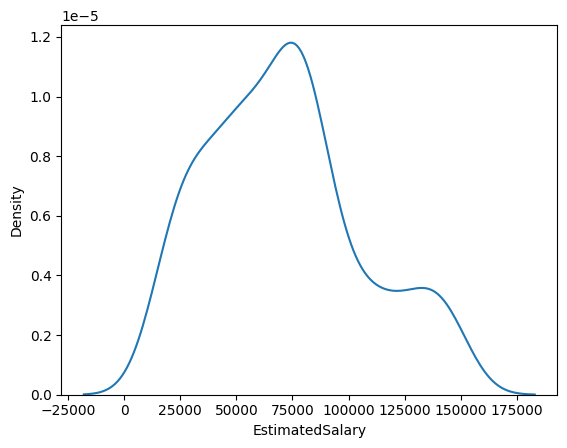

In [48]:
sns.kdeplot(X_train['EstimatedSalary'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

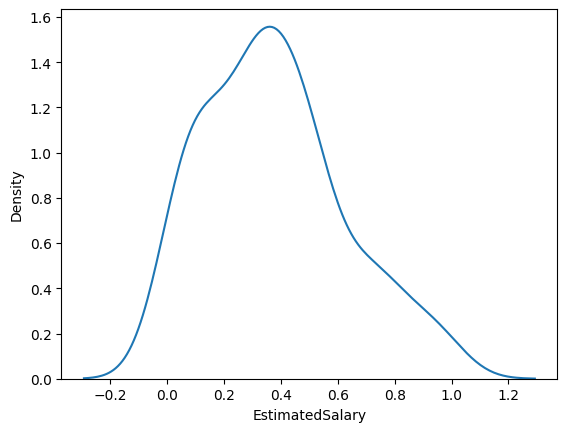

In [49]:
sns.kdeplot(x_test_min_max['EstimatedSalary'])

In [53]:
adv =pd.read_csv(r"E:\Dataset\Social_Network_Ads\Social_Network_Ads.csv")
adv

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
